## 3. Matrix Factorization OR Neural Networks
### (i) Option 1:  Matrix Factorization
### (a)

In [14]:
run starter_code/part_a/matrix_factorization.py

Evaluating SVD with k = 1   Current max accuracy is 0.6428 with k = 1
Evaluating SVD with k = 2   Current max accuracy is 0.6579 with k = 2
Evaluating SVD with k = 3   Current max accuracy is 0.6583 with k = 3
Evaluating SVD with k = 4   Current max accuracy is 0.6583 with k = 3
Evaluating SVD with k = 5   Current max accuracy is 0.659 with k = 5
Evaluating SVD with k = 6   Current max accuracy is 0.659 with k = 5
Evaluating SVD with k = 7   Current max accuracy is 0.6592 with k = 7
Evaluating SVD with k = 8   Current max accuracy is 0.6603 with k = 8
Evaluating SVD with k = 9   Current max accuracy is 0.6613 with k = 9
Evaluating SVD with k = 10   Current max accuracy is 0.6613 with k = 9
Evaluating SVD with k = 11   Current max accuracy is 0.6613 with k = 9
Evaluating SVD with k = 12   Current max accuracy is 0.6613 with k = 9
Evaluating SVD with k = 13   Current max accuracy is 0.6613 with k = 9
Evaluating SVD with k = 14   Current max accuracy is 0.6613 with k = 9
Evaluating SVD wi

### (b)
Note that our training matrix is extremely sparse in other words containing lots of missing values. Thus we fill in these values using the average on the each item before doing SVD. This might not be a good practice since because by filling in such values  in all the sparse locations could end up having more noise terms than the actual meaningful good data points.

### (c) 
We have our implementations below with doctrings and comments excluded,

In [15]:
def update_u_z(train_data, lr, u, z):
    i = np.random.choice(len(train_data["question_id"]), 1)[0]
    c = train_data["is_correct"][i]
    n = train_data["user_id"][i]
    q = train_data["question_id"][i]
    u[n] = u[n] + lr * (c - np.dot(u[n], z[q].T))*z[q]
    z[q] = z[q] + lr * (c - np.dot(u[n], z[q].T))*u[n]
    return u, z

def als(train_data, k, lr, num_iteration):
    u = np.random.uniform(low=0, high=1 / np.sqrt(k),
                          size=(len(set(train_data["user_id"])), k))
    z = np.random.uniform(low=0, high=1 / np.sqrt(k),
                          size=(len(set(train_data["question_id"])), k))
    for i in range(num_iteration):
        u, z = update_u_z(train_data, lr, u, z)
    print(squared_error_loss(train_data, u, z))
    mat = u.dot(z.T)
    return mat

### (d)
After some parameter tunning we learn our model with a 0.08 learning rate with 70000 number of iterations with number of factor k = 130.

In [22]:
run starter_code/part_a/matrix_factorization.py

Evaluating k = 5, current max accuracy achieved on k = 0 with 0
Evaluating k = 10, current max accuracy achieved on k = 5 with 0.6922
Evaluating k = 20, current max accuracy achieved on k = 10 with 0.6928
Evaluating k = 40, current max accuracy achieved on k = 10 with 0.6928
Evaluating k = 70, current max accuracy achieved on k = 10 with 0.6928
Evaluating k = 100, current max accuracy achieved on k = 10 with 0.6928
Evaluating k = 130, current max accuracy achieved on k = 10 with 0.6928
Evaluating k = 160, current max accuracy achieved on k = 130 with 0.698
Evaluating k = 190, current max accuracy achieved on k = 130 with 0.698

Maximum accuracy achieved on validation set = 0.698  with k = 130.

Accuracy achieved on test set = 0.7036 with our selected k = 130.


### (e)
With k = 130 and learning rate 0.08 with 70000 number of iterations we have our validation squared error loss plot as follows,


Maximum accuracy achieved on validation set = 0.6926.

Accuracy achieved on test set = 0.6955


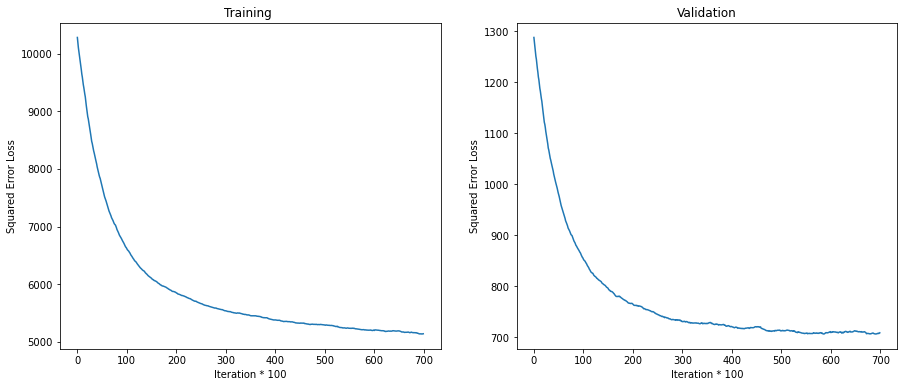

In [31]:
run starter_code/part_a/matrix_factorization.py

### (f)
Note that since we are predicting values $\in [0, 1]$  a squared error loss might not be that suitable. Instead we can consider a cross entropy loss,

\begin{align*}
    y &= \sigma(z)\\
      &= \frac{1}{1 + e^{-z}}\\\\
    \mathcal{L}_{CE}(y, t) &= -tlogy - (1-t)log(1-y)
\end{align*}

Where in our contex our objective becomes,
\begin{align*}
    min \sum_{(x,m)\in \mathcal{O}}^{}-C_{nm}log(\sigma(\textbf{u}_{n}^{T}\textbf{z}_{m})) - (1-C_{nm})log(1-\sigma(\textbf{u}_{n}^{T}\textbf{z}_{m}))
\end{align*}

### 4.  Ensemble

We choose to train one KNN, one Item Response models, and one Matrix factorization model on bootstrapped training data and obatain results by averaging the predicted correctness.

We obatain our 3 bootstaped data that has the same size of our original traning data using the folowing algorithm,

In [1]:
def resample(data, m):
    size = len(data["question_id"])
    bags_of_data = []
    num_bags = 0
    while num_bags < m:
        bag = {'user_id': [], 'question_id': [],
               'is_correct': []}
        print("Creating bag number {}". format(num_bags + 1))
        while len(bag["question_id"]) < size:
            index = np.random.choice(size, 1)[0]
            uid = data['user_id'][index]
            qid = data['question_id'][index]
            aid = data['is_correct'][index]
            bag['user_id'].append(uid)
            bag['question_id'].append(qid)
            bag['is_correct'].append(aid)
        bags_of_data.append(bag)
        num_bags += 1
    return bags_of_data

Next we construct our ensemble by training different models on such data,

In [ ]:
# Specify number of bags to train on each model
########################################################
vanilla_mf = 1
knn_item = 1
knn_user = 0
vanilla_irt = 1
irt_with_bias = 0
mf_with_bias = 0
mf_with_bias_gender = 0
mf_with_CE_loss = 0

NUM_OF_BAGS = (knn_item + knn_user + vanilla_irt + irt_with_bias +
               vanilla_mf + mf_with_bias + mf_with_bias_gender + mf_with_CE_loss)
########################################################
# Generate bootstrapped data
bags = resample(train_data, NUM_OF_BAGS)
N = 542
M = 1774
sum_conf_mat = np.zeros((N, M))
# Ensemble of each model specified above
for i in range(len(bags)):
    if i < NUM_OF_BAGS - irt_with_bias - vanilla_irt:
        if i < vanilla_mf:
            print("Fitting vanilla Matrix Factorization on data set number: {}.".format(i + 1))
            mat = als(bags[i], 120, 0.08, 140000)

        elif i < vanilla_mf + mf_with_bias_gender:
            print("Fitting Matrix Factorization with user bias, question bias, and gender bias "
                  "on data set number: {}.".format(i + 1))
            mat = als_with_bias_and_gender(bags[i], 70, 0.04, 350000, 0.02, gender_matrix)

        elif i < vanilla_mf + mf_with_bias_gender + mf_with_CE_loss:
            print("Fitting Matrix Factorization with cross entropy loss on data set number: {}.".format(i + 1))
            mat = als_logistic(bags[i], 240, 0.08, 280000, 0.02)

        elif i < vanilla_mf + mf_with_bias_gender + mf_with_CE_loss + knn_item:
            print("Fitting Nearest neighbor by item on data set number: {}.".format(i + 1))
            nbrs = KNNImputer(n_neighbors=21)
            new_mat = resampled_data_to_matrix(bags[i])
            mat = nbrs.fit_transform(np.transpose(new_mat)).T
        elif i < vanilla_mf + mf_with_bias_gender + mf_with_CE_loss + knn_item + knn_user:
            print("Fitting Nearest neighbor by user data set number: {}.".format(i + 1))
            nbrs = KNNImputer(n_neighbors=11)
            new_mat = resampled_data_to_matrix(bags[i])
            mat = nbrs.fit_transform(new_mat)
        else:
            mat = als_with_bias(bags[i], 120, 0.08, 230000, 0.001)

        sum_conf_mat += mat
    else:
        if i < NUM_OF_BAGS - vanilla_irt:
            print("Fitting Item Response Model with bias on data set number: {}.".format(i + 1))
            num_iteration = 232
            theta = np.ones((N, 1))
            beta = np.ones((M, 1))
            alpha = np.ones((M, 1))
            for _ in range(num_iteration):
                new_mat = sparse.csc_matrix(resampled_data_to_matrix(bags[i]))
                theta, beta, alpha = update_theta_beta_alpha(new_mat, 0.001, theta, beta, alpha)
            sum_conf_mat += get_pred_matrix_IRT(theta, beta, alpha)
        else:
            print("Fitting vanilla Item Response Model on data set number: {}.".format(i + 1))
            num_iteration = 76
            theta = np.ones((N, 1))
            beta = np.ones((M, 1))
            for _ in range(num_iteration):
                new_mat = sparse.csc_matrix(resampled_data_to_matrix(bags[i]))
                theta, beta = update_theta_beta(new_mat, 0.001, theta, beta)
            sum_conf_mat += get_pred_matrix_no_alpha_IRT(theta, beta)

avg_mat = sum_conf_mat/NUM_OF_BAGS
final_acc_valid = sparse_matrix_evaluate(val_data, avg_mat)
final_acc_test = sparse_matrix_evaluate(test_data, avg_mat)

Next we fit our three models to the bootstrapped data which has the same size of our original training data, after we done training we average our user-item interaction matrix obtained from the three models and take the average of the three. In the end we use our averaged prediciton matrix and evaluate on validation set and test set.

In [10]:
run starter_code/part_a/ensemble

Creating bag number 1
Creating bag number 2
Creating bag number 3
Fitting naive Matrix Factorization on data set number: 1.
Fitting Nearest neighbor by item on data set number: 2.
Fitting Item Response Model with bias on data set number: 3.

Maximum accuracy of mf achieved on validation set = 0.7125.

Accuracy of mf achieved on test set = 0.694


We see that after ensembling our three base models and traning them on three bootstrapped data the final prediction matrix obtained has an improve in performace over all the base models just by themselves. From the bias-variance decomposition lecture  we see that how ensembling multiple moderate learners togetheres reduces variance, this fully applies in our example since we have three moderate learners that learn through different methods and it is resonable to say that the errors of the three models are mostly un-corellated thus through bagging and ensembling we should expect such improvement in accuracy. 

# Part b.

### 1. Formal Description:

We consider a approach based on matrix factoriazation with the extension of a user bias, question bias, and a gender bias.

First, we recap on the vanilla matrix factorization approach with mean squared error loss

\begin{align*}
    R_{nq} &= u_{n}z_{q}\\\\
    \underset{\textbf{U, Z}}{min} \frac{1}{2}&\sum_{(n,q)\in \mathcal{O}}^{}\big(C_{nq}- \textbf{u}_{n}^{T}\textbf{z}_{q}\big)^{2}\\  
\end{align*}

Note that in this vanilla version of matrix factorization the model caputures the iteraction between students and questions that whether for a specific student for a specific question will have a correct or incoreect response. However, when considering student responses it is really likely there are effects that are limited to a specific student or question and is independent of iteraction.

Consider the case where a student has a solution manuel of some of the responses. Then he is more likely to score correctly on a repsonse independent of the student question interaction. Similarly, where a question is at a level to high above the student's abilities then for any students attempting this question they are unlikely to get it correct independet of which student attemtps. Thus we propose two bias terms to try in capture this type of behavior so that our model accounts for user bias and question bias accordingly.

Consider the new model,

\begin{align*}
    R_{nq} &= u_{n}z_{q} + b + \theta_{n} + \beta_{q}\\\\
    \underset{\textbf{U, Z}}{min} \frac{1}{2}&\sum_{(n,q)\in \mathcal{O}}^{}\big(C_{nq}- \textbf{u}_{n}^{T}\textbf{z}_{q} - b - \theta_{n} - \beta_{q}\big)^{2}\\  
\end{align*}

Where $b$ is the average score through all observed responses, $\theta_{n}$ bias of student n, and $\beta_{q}$ bias of question q.

Now that our model accounts for student question interactions and student, question biases. In order to make our model mor meaningful and have more accurate predictions of student responses. We make use of the student metadata Gender and incorporte a gender bias term to our model.

Thus we have,

\begin{align*}
    R_{nq} &= u_{n}z_{q} + b + \theta_{n} + \beta_{q} + g(n)\\\\
    \underset{\textbf{U, Z}}{min} \frac{1}{2}&\sum_{(n,q)\in \mathcal{O}}^{}\big(C_{nq}- \textbf{u}_{n}^{T}\textbf{z}_{q} - b - \theta_{n} - \beta_{q} - g(n)\big)^{2}\\  
\end{align*}

Where $g(n)$ acounts for the gender bias of user n.

At last, to account for overfitting we apply L2 regularization to our model variabels. Thus, we have our final model,

\begin{align*}
    R_{nq} &= u_{n}z_{q} + b + \theta_{n} + \beta_{q} + g(n)\\\\
    \underset{\textbf{U, Z}}{min} \frac{1}{2}&\sum_{(n,q)\in \mathcal{O}}^{}\big(C_{nq}- \textbf{u}_{n}^{T}\textbf{z}_{q} - b - \theta_{n} - \beta_{q} - g(n)\big)^{2} + \lambda \big(\|\textbf{u}_{n}\|^2 +  \|\textbf{z}_{q} \|^2 + \|\theta_{n}\|^2 +  \|\beta_{q}\|^2 + \|g(n)\|^2\big)\\  
\end{align*}


### 2. Figure or Diagram:

We take a look of the following figure to ease our understanding of the process. We illustrate how user-item matrix can be factorized as latent factors representing latent user and item features respectively.

\begin{align*}
    R &= \textbf{U}\textbf{Z} 
\end{align*}

Where $R$ represents the etsimated User-item matrix by multiplying the User latent factors $\textbf{U}$ and Item latent factors $\textbf{Z}$ in our case students and questions respectively. 

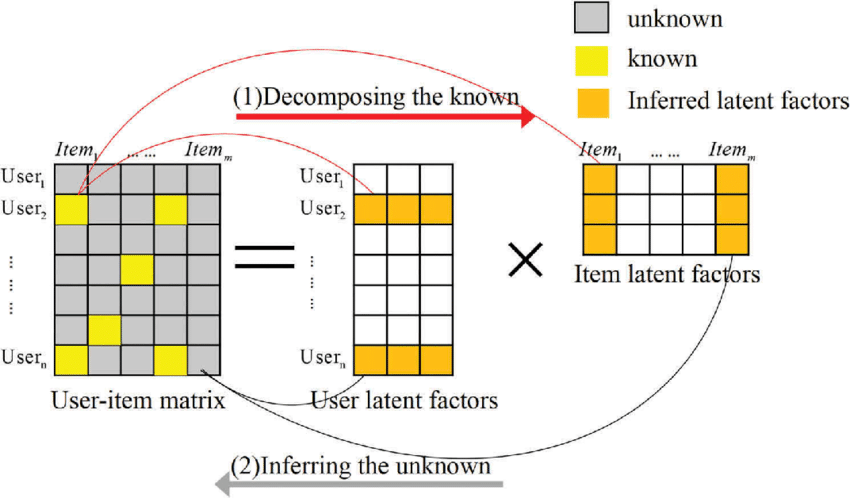

In [11]:
from IPython.display import Image
Image(filename='mf.png') 

Image from https://www.researchgate.net/figure/Diagram-of-matrix-factorization_fig1_321344494

In addition to the above we also add the three $n \times m$ bias matrices element wise to $R$, 

Where user bias,

\begin{align*}
    \boldsymbol{\theta}=
    \begin{pmatrix}
        \theta_{1} & \theta_{1} & \theta_{1} & ... & \theta_{1}\\
        \theta_{2} & \theta_{2} & \theta_{2} & ... & \theta_{2}\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        \theta_{n} & \theta_{n} & \theta_{n} & ... & \theta_{n}
    \end{pmatrix} 	 
\end{align*}


Question bias,

\begin{align*}
    \boldsymbol{\beta}=
    \begin{pmatrix}
        \beta_{1} & \beta_{2} & \beta_{3} & ... & \beta_{m}\\
        \beta_{1} & \beta_{2} & \beta_{3} & ... & \beta_{m}\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        \beta_{1} & \beta_{2} & \beta_{3} & ... & \beta_{m}
    \end{pmatrix} 	 
\end{align*}

At last the gender bias,

\begin{align*}
    \textbf{G} =
    \begin{pmatrix}
        g(1) & g(1) & g(1) & ... & g(1)\\
        g(2) & g(2) & g(2) & ... & g(2)\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        g(n) & g(n) & g(n) & ... & g(n)
    \end{pmatrix} 	 
\end{align*}

Thus our resulting $R$ equals,

\begin{align*}
    R =
    \begin{pmatrix}
        R_{11} & R_{12} & R_{13} & ... & R_{1m}\\
        R_{21} & R_{22} & R_{23} & ... & R_{2m}\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        R_{n1} & R_{n2} & R_{n3} & ... & R_{nm}
    \end{pmatrix} = UZ +
    \begin{pmatrix}
        \theta_{1} & \theta_{1} & \theta_{1} & ... & \theta_{1}\\
        \theta_{2} & \theta_{2} & \theta_{2} & ... & \theta_{2}\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        \theta_{n} & \theta_{n} & \theta_{n} & ... & \theta_{n}
    \end{pmatrix} +
    \begin{pmatrix}
        \beta_{1} & \beta_{2} & \beta_{3} & ... & \beta_{m}\\
        \beta_{1} & \beta_{2} & \beta_{3} & ... & \beta_{m}\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        \beta_{1} & \beta_{2} & \beta_{3} & ... & \beta_{m}
    \end{pmatrix} +
    \begin{pmatrix}
        g(1) & g(1) & g(1) & ... & g(1)\\
        g(2) & g(2) & g(2) & ... & g(2)\\
        ...    & ...    & ...    & ... & ...   \\
        ...    & ...    & ...    & ... & ...   \\
        g(n) & g(n) & g(n) & ... & g(n)
    \end{pmatrix} 	 
\end{align*}


### 3. Comparison or Demonstration:

We compare our augmented model with the vanilla version matrix factorization.

We first take a look of the vanilla matrix factorization model we train the vanilla matrix factorization with k = 130 and learning rate 0.08 with 70000 number of iterations.


Maximum accuracy achieved on train set = 0.7368.

Maximum accuracy achieved on validation set = 0.6901.

Accuracy achieved on test set = 0.6983


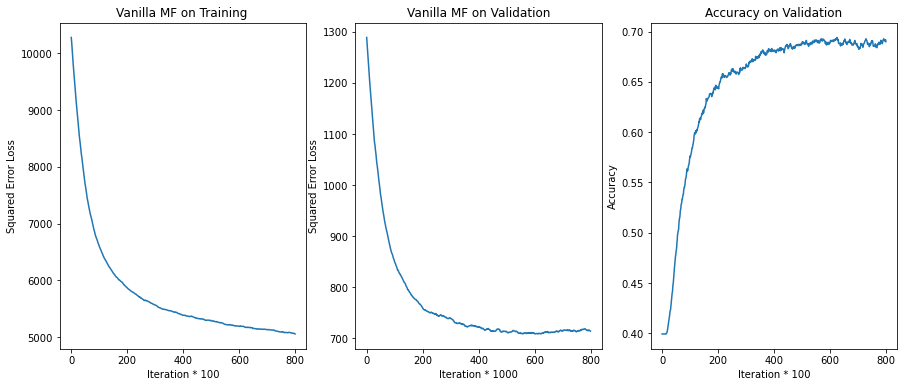

In [18]:
run starter_code/part_a/matrix_factorization

Next we take see how our new aumented model performs, we train our augmented model with k = 70, learning rate= 0.04, regularization parameter = 0.02 with 350000 number of iterations,


Maximum accuracy achieved on train set = 0.7666.

Maximum accuracy achieved on validation set = 0.7001.

Accuracy achieved on test set = 0.6946


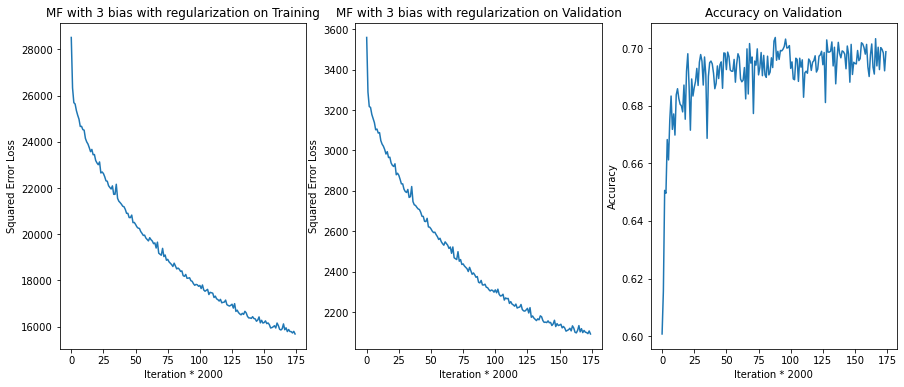

In [21]:
run starter_code/part_a/matrix_factorization

Comparing the two models we see that in temrs of Mean Squared error loss, our new proposed model has a higher loss in general and also decays more slowly. This is resonable since we incorporated regularization of each the parameters to our model in order to prevent overfitting.

In terms of accuracy, we see that our new proposed model has slight improvements. We also observe as we get near the 70 percent mark both model's accuracy starts to plateu but our new model remains with some small flutuations. Both model seems like to converge at 70 percent accuracy mark.

#### Disentangle the effect of each component.
In order to disentangle the benefits of our proposed models, we break our model into smaller augmentation components and then add in each components one by one to see the effects.

We first consider the benefits of adding in the regularization term, we examine the performance of the vanilla matrix factorization with regularization. We train the model with k = 130, and learning rate 0.08, regularization coefficient = 0.05 with 70000 number of iterations.


Maximum accuracy achieved on train set = 0.7206.

Maximum accuracy achieved on validation set = 0.6904.

Accuracy achieved on test set = 0.6794


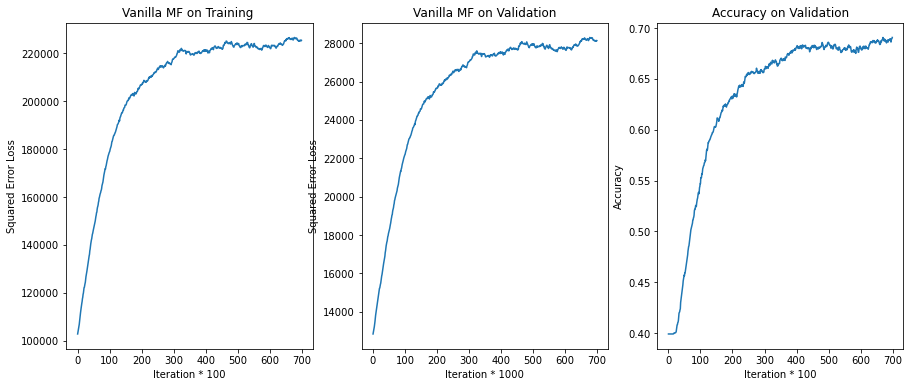

In [22]:
run starter_code/part_a/matrix_factorization

We see that after adding the regularization component into our model with the same number of iteration of the previous vanilla matrix factorization our loss were able to decay at a slower pace. Thus it it resonable to say that our regularization does reduce overfitting.

Next we consider adding the user bias and question bias into our model. We train our model with k = 130, and learning rate 0.08, regularization coefficient = 0.05 with 70000 number of iterations.


Maximum accuracy achieved on train set = 0.7191.

Maximum accuracy achieved on validation set = 0.6932.

Accuracy achieved on test set = 0.694


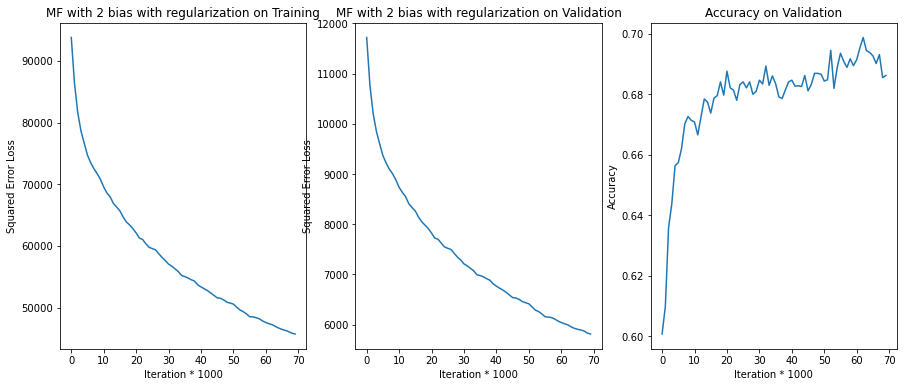

In [25]:
run starter_code/part_a/matrix_factorization

Compared to the previous model, we see that we have slight increase in validation acccuracy. Thus we can say that adding such bias terms does improve the model. Compared to the resultes of the final model we see that after adding the gender bias into our model, we have further improve in validation accuracy thus we can also say adding the gender bias term also improves our model a bit.

### 4. Limitations:

There are still multiple limitation to the model, where some are caused by the nature of the problem, and some are due to the architecture of our model. We discuss some main settings where our model behaves poorly.

#### 1. When they are no responses or only a few responses for some students or for some questions.
In this case our model only has little information about these specific students or questions, and thus cannot make meaningful predictions for them.

Note that the problem of data sparsity in such collaborative filtering problems does not only limit to our context but is in fact a general problem in recommender systems. Since our model is fit through a mean squared error loss, model predictions would deeply rely on number of responses of these user-item pairs in order to make prediction for them.

To address this problem, one might consider a different recommending approach. Instead of a collaborative filtering system, we might want to try a content based system which only relies on user preferences and item descriptions.

#### 1. When many new students or many new questions are  added into the model.
Since we are trying to predict student reponses on online education services, the amount of users and questions can get extremly large. There are mutiple problems that this will cause, first our model's training time would scale significanly as datasize increases. Second, as we add new students and new question into the model we do not have any previous information on them, thus we cannot make meaningful predictions for them until we have suffient responses from them. Also, as dimension gets even larger we have the curse of dimensinality which makes the problem of datasparsity even worse.

To address this problem, one might also consider a different recommending approach. Instead of a collaborative filtering system, we might want to try a content based system which only relies on user preferences and item descriptions.

#### 1. When student does not respond to questions according to their ability or question responses has no reflection on a student.
In order for our model to be meaningful and have accurate predictions, we assume that every student-question pair response some how reflect the student's ability as well as the question's difficulty. However, since most of the questions in such online education platforms are multiple choice based questions, in the case where a student blindly guesses a question and submits a response our model would not be able to capture such behaviors and thus such responses will contribute as pure noise to our model. Another case is where the question is not meaningful at all. In this case reponses for such questions will also contribute as pure noise.

To address this problem, one way is to try incorporating such behaviors of students and questions into the model, namely a guessing parameter and a rating parameter of how good the problem is. We might want to account for the probability of a student guessing and the rating parameter of the problem when designing our models.